In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook
#%matplotlib nbagg

# Finding the value of $\pi$

In [2]:
N = 10000
r = 1
c = [2,4]

xs = (c[0]-r)+2*r*np.random.rand(N)
ys = (c[1]-r)+2*r*np.random.rand(N)

inside = (xs-c[0])**2 + (ys-c[1])**2 <= r**2
print(4*inside.sum()/len(inside))

3.1252


<IPython.core.display.Javascript object>


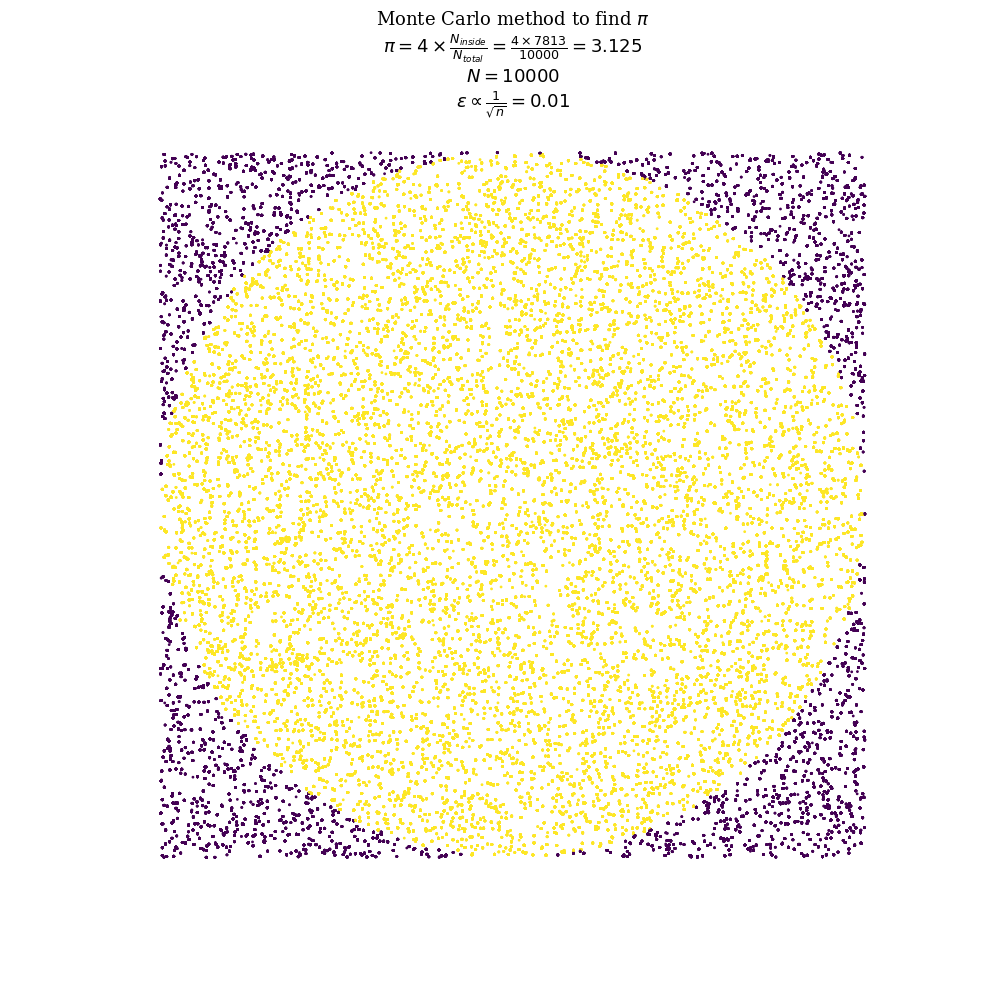

In [3]:
fig = plt.figure(figsize=(10,10))
step = 200
frames = [(i+1)*step for i in range(int(N/step))]

font_title = {
        'family': 'serif',
        'color':  'Black',
        'weight': 'normal',
        'size': 13}

def init_func():
    pass

def draw(i):
    plt.scatter(xs[0:i], ys[0:i], c=inside[0:i], s=1)
    plt.title("Monte Carlo method to find $\pi$\n" +
              "$\pi = 4\\times \\frac{N_{inside}}{N_{total}} = $" +
              "$ \\frac{4\\times%.i}{%.i} = $" %(inside[0:i].sum(), len(inside[0:i])) + 
              f"${4*inside[0:i].sum()/len(inside[0:i]):.3f}$\n$" +
              f"N = {len(inside[0:i])}$\n" +
              "$\epsilon \propto  \\frac{1}{\\sqrt{n}} = %.2f$"%(1/np.sqrt(len(inside[0:i])) ),
              fontdict=font_title
             ) 
    plt.axis("off")
    plt.axis("equal")

animation = FuncAnimation(plt.gcf(), draw, frames=frames, interval=10, repeat=False, init_func=init_func)
#animation.save('./Montecarlo_pi.gif', writer='ffmpeg')

# Monte Carlo Integration

The integration of the function $f(x)$ in the open interval $(a,b)$ can be estimated by using the Monte Carlo method:

\begin{equation}
    \int_a^b f(x)dx \approx \frac{b-a}{N} \sum_{i=1}^{N}f(x_i)
\end{equation}

where the $x_i$ are random numbers such that $X \sim U(a,b)$. We can also find the value of the integral not by using the expected value of $f(x)$ but using the proportion of points under $f(x)$ respect to the total amount of points. But this case the function must be positive in the open interval $(a,b)$, it is $f(x) \geq 0 $ for $x \in (a,b)$:

\begin{equation}
    \int_a^b f(x)dx \approx M(b-a)\frac{N_{in}}{N_{total}}
\end{equation}

$M$ is the maximum value of $f(x)$ in the interval $(a,b)$.

In [5]:
def mc1_integrate(f, a, b, N=1000000, **kwards):
    """
    Retunrs the integrate of f(x) in the interval (a,b)
    by using the Monte Carlo method with the expected 
    value of the function f. 
    f: funct
        Function to integrate.
    a: float
        Lower extreme of integration.
    b: float
        Upper extreme of integration.
    N: int
        Number of iterations for the Monte Carlo method.
        Default 1000000.
    **kwards: args
        Args for f.
    """
    
    xs = a + (b-a)*np.random.rand(N)
    ys = f(xs, **kwards)
    return (b-a)*np.sum(ys)/N


def mc2_integrate(f, a, b, N=1000000, **kwards):
    """
    Retunrs the integrate of f(x) in the interval (a,b)
    by using the Monte Carlo method with the proportion
    of points under the curve f respect to the total amount
    of points. 
    f: funct
        Function to integrate.
    a: float
        Lower extreme of integration.
    b: float
        Upper extreme of integration.
    N: int
        Number of iterations for the Monte Carlo method.
        Default 1000000.
    **kwards: args
        Args for f.
    """
    #Maximum value of f in the interval (a,b).
    M  = np.max(f(np.linspace(a, b, 100), **kwards))
    
    #Random numbers in [a,b]x[0,M]
    xs = a + (b-a)*np.random.rand(N)
    ys = M*np.random.rand(N)
    
    inside = ys <= f(xs, **kwards)
    return M*(b-a)*inside.sum()/N

<h3>Example</h3>
Lets test this method by integrating the function $f(x) = 2\sqrt{1 - x^2}$ in the interval $(-1,1)$. The result of this integral equals $\pi$: 

\begin{equation}
    \int_{-1}^1 \sqrt{1 - x^2}dx = \frac{\pi}{2}
\end{equation}

\begin{equation}
    2\int_{-1}^1 \sqrt{1 - x^2}dx = \pi
\end{equation}

In [6]:
def func(x, r):
    return 2*np.sqrt(r**2-x**2)

dic = {"r":1}

In [12]:
step = 1000
Ns   = range(1, 1000000+step, step)
a = -1
b =  1

pi_1 = []
pi_2 = []

for n in Ns:
    pi_1.append(mc1_integrate(func, a, b, N=n, **dic))
    pi_2.append(mc2_integrate(func, a, b, N=n, **dic))

<IPython.core.display.Javascript object>


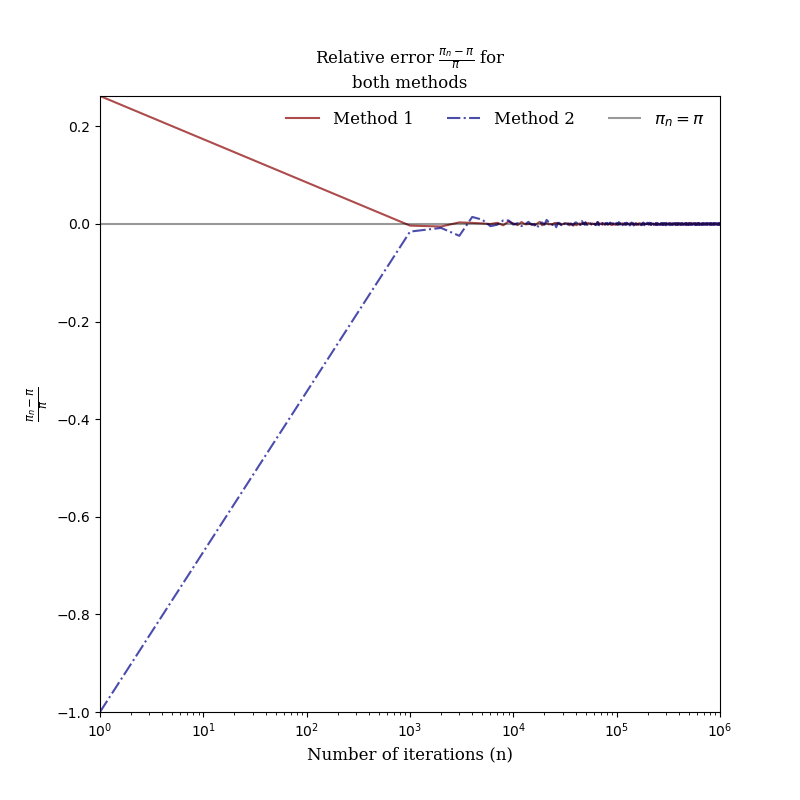

In [14]:
fig = plt.figure(figsize=(8,8))
plt.plot(Ns, (np.array(pi_1)-np.pi)/np.pi, "-",  label="Method 1",    color="darkred",  alpha=0.7)
plt.plot(Ns, (np.array(pi_2)-np.pi)/np.pi, "-.", label="Method 2",    color="darkblue", alpha=0.7)
plt.hlines(0, min(Ns), max(Ns),                  label="$\pi_n=\pi$", color="black",    alpha=0.4)

font_title = {
        'family': 'serif',
        'color':  'Black',
        'weight': 'normal',
        'size': 12}

font_label = {
        'family': 'serif',
        'weight': 'normal',
        'size': 12}

plt.xscale("log")
plt.xlabel("Number of iterations (n)", fontdict=font_label)
plt.ylabel("$\\frac{\pi_n-\pi}{\pi}$", fontdict=font_label)
plt.title("Relative error $\\frac{\pi_n-\pi}{\pi}$ for \n" + 
          "both methods", fontdict=font_title)
plt.xlim(min(Ns), max(Ns))
plt.ylim(min(min((np.array(pi_1)-np.pi)/np.pi), min((np.array(pi_2)-np.pi)/np.pi)),
         max(max((np.array(pi_1)-np.pi)/np.pi), max((np.array(pi_2)-np.pi)/np.pi)))
plt.legend(loc="best", shadow=True, ncol=3, prop=font_label, frameon=False)

# Monte Carlo simulation for finances

In [34]:
"""try:
    import pandas_datareader as pdr
    import pandas_datareader.data as web
except:
    !pip install pandas-datareader
    import pandas_datareader as pdr
    
import datetime as dt

web.DataReader('GE', 'yahoo', start='2019-09-10', end='2019-10-09')"""

"try:\n    import pandas_datareader as pdr\n    import pandas_datareader.data as web\nexcept:\n    !pip install pandas-datareader\n    import pandas_datareader as pdr\n    \nimport datetime as dt\n\nweb.DataReader('GE', 'yahoo', start='2019-09-10', end='2019-10-09')"

In [116]:
p0 = 4000
T  = 365
N  = 6

mean = 0
std  = 10

ps = np.zeros_like([], shape=(N,T))
ps[:,0][:] = p0

In [118]:
for n in range(N):
    for d in range(1,T):
        ps[n][d] = ps[n][d-1] + np.random.normal(loc=mean, scale=std)

In [119]:
ps

array([[4000.        , 4007.90209446, 4013.12697962, ..., 3718.85772448,
        3717.44028793, 3730.8248747 ],
       [4000.        , 4006.58830632, 4005.79930385, ..., 3944.30818034,
        3926.29779048, 3919.62760128],
       [4000.        , 4003.8856863 , 3995.0178905 , ..., 4445.7060242 ,
        4441.46777327, 4443.48208525],
       [4000.        , 4002.76868498, 4017.09675303, ..., 3930.89238602,
        3954.77809382, 3956.14427192],
       [4000.        , 4002.02955703, 4021.19603533, ..., 3994.17862397,
        3995.15451434, 3978.23066424],
       [4000.        , 3992.31515746, 4018.84261222, ..., 4421.05343021,
        4424.00183932, 4435.62404603]])

<IPython.core.display.Javascript object>


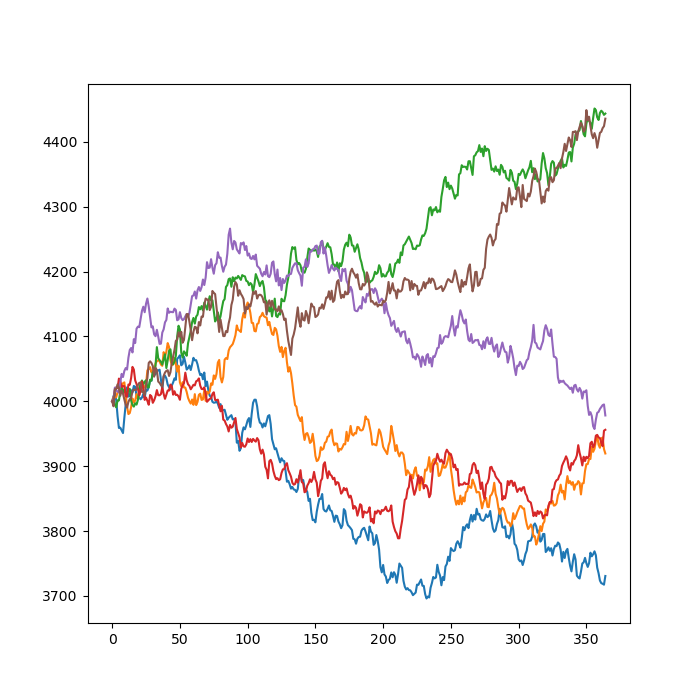

In [120]:
fig = plt.figure(figsize=(7,7))

for i in range(len(ps)):
    plt.plot(ps[i])